In [1]:
import numpy as np, matplotlib.pyplot as plt, itertools
from sympy import *

# Exercise 1
Show that $\frac{d}{dt}\frac{\partial L}{\partial \dot{x_{I}}} - \frac{\partial L}{\partial x} = 0\equiv F = ma$.

$L = T - V = \frac{1}{2}m\dot{x}^{2} - V(x)$

$\frac{\partial L}{\partial \dot{x}} = m\dot{x}$

$\frac{\partial L}{\partial x} = -\frac{\partial V}{\partial x}$

$\frac{d}{dt}m\dot{x} = m\ddot{x}$

$F = -\frac{\partial V}{\partial x}$

$\implies m\ddot{x} - F = 0 \equiv F = ma$

# Exercise 2
Show that $\frac{d}{dt}(\frac{\partial L}{\partial \dot{x}_{i}}) - \frac{\partial L}{\partial x_{i}} = 0\equiv F_{i} = m_{i}\ddot{x}_{i}$.

$\frac{\partial L}{\partial \dot{x}_{i}} = m_{i}\dot{x}_{i}$

$\frac{\partial L}{\partial x_{i}} = -\frac{\partial V}{\partial x_{i}}$

$\frac{d}{dt}m_{i}\dot{x}_{i} = m_{i}\ddot{x}_{i}$

$F_{i} = -\frac{\partial V}{\partial x_{i}}$

$\implies m_{i}\ddot{x}_{i} - F_{i} = 0 \equiv F_{i} = m_{i}\ddot{x}_{i}$

# Exercise 3
Use the Euler-Lagrange equations to derive the equations of motion from the Lagrangian in 

$L = \frac{m}{2}( \dot{X}^{2}+ \dot{Y}^{2}) + \frac{mw^{2}}{2}(X^{2}+Y^{2}) + mw(\dot{X}Y - \dot{Y}X)$

$\frac{\partial L}{\partial X} = mw^{2}X - mw\dot{Y}$

$\frac{\partial L}{\partial Y} = mw^{2}Y + mw\dot{X}$

$\frac{\partial L}{\partial \dot{X}} = m\dot{X} + mwY$

$\frac{\partial L}{\partial \dot{Y}} = m\dot{Y} - mwX$

Euler-Lagrange Equation:

$\frac{d}{dt}(\frac{\partial L}{\partial \dot{x}_{i}}) - \frac{\partial L}{\partial x_{i}} = 0$

$\implies \frac{d}{dt}( m\dot{X} + mwY) = mw^{2}X - mw\dot{Y} \equiv \ddot{X} = w^{2}X - 2w\dot{Y}$

$\implies \frac{d}{dt}( m\dot{Y} - mwX) = mw^{2}Y + mw\dot{X} \equiv \ddot{Y} = w^{2}Y + 2w\dot{X}$

# Exercise 4
Work out $L = \frac{m}{2}( \dot{X}^{2}+ \dot{Y}^{2}) + \frac{mw^{2}}{2}(X^{2}+Y^{2}) + mw(\dot{X}Y - \dot{Y}X)$ and $\frac{d}{dt}(\frac{\partial L}{\partial \dot{x}_{i}}) - \frac{\partial L}{\partial x_{i}} = 0$ in polar coordinates.


Polar coordinates:

$X = Rcos(\theta)$

$Y = Rsin(\theta)$

$\dot{X} = \dot{R}cos(\theta) - R \dot{\theta}\sin{(\theta)}$

$\dot{Y} = \dot{R}sin(\theta) + R \dot{\theta} \cos{(\theta)}$

Expressing our terms in polar coordinates and solving using trig identities

$\implies \dot{X}^{2}+ \dot{Y}^{2} = (\dot{R}cos(\theta) - R \dot{\theta}\sin{(\theta)})^{2}$

$= \dot{R}^{2}cos^{2}(\theta) + R^{2}\dot{\theta}^{2}sin^{2}(\theta) - 2R\dot{\theta}cos(\theta)\dot{R}sin(\theta) + \dot{R}^{2}sin^{2}(\theta) + R^{2}\dot{\theta}^{2}cos^{2}(\theta) +2R\dot{\theta}cos(\theta)\dot{R}sin(\theta) $

$ = \dot{R}^{2}[cos^{2}(\theta) + sin^{2}(\theta)] + R^{2}\dot{\theta}^{2}[sin^{2}(\theta)+cos^{2}(\theta)]$

$= \dot{R}^{2} + R^{2}\dot{\theta}^{2}$


Plugging back into the Lagrangian

$\implies L = \frac{m}{2}( \dot{R}^{2} + R^{2}\dot{\theta}^{2})$

$\frac{\partial L}{\partial R} = mR\dot{\theta}^{2}$

$\frac{\partial L}{\partial \dot{R}} = m\dot{R}$

$\frac{\partial L}{\partial \theta} = 0$

$\frac{\partial L}{\partial \dot{\theta}} = mR^{2}\dot{\theta}$

Thus the Euler-Lagrange equations

$\frac{d}{dt}(m\dot{R}) = mR\dot{\theta}^{2}$

$\equiv \ddot{R} = R\dot{\theta}^{2}$

$\frac{d}{dt}(mR^{2}\dot{\theta}) = 0$

$\equiv R^{2}\ddot{\theta} = -2R\dot{R}\dot{\theta} $

# Exercise 5
Predict the motion of a pendulum

$ T = \frac{m}{2}(l\dot{\theta})^{2}$

$ V = mgl(1-cos(\theta))$

$ L = \frac{m}{2}l^{2}\dot{\theta}^{2} - mgl(1-cos(\theta))$

The length (l) of the rod is constant, so we will only use $\theta$

$\frac{\partial L}{\partial \theta} = -mglsin{\theta}$

$\frac{\partial L}{\partial \dot{\theta}} = ml^{2}\dot{\theta} $

Plugging into the Euler-Lagrange

$\frac{d}{dt}ml^{2}\dot{\theta} - (-mglsin{\theta}) = 0$

$\equiv \ddot{\theta} = - \frac{g}{l}sin(\theta)$

Our gut check verifies that the acceleration on $\theta$ should be negative, and that due to the circular motion of pendulum about the origin at the length, $R$, this expression makes sense.

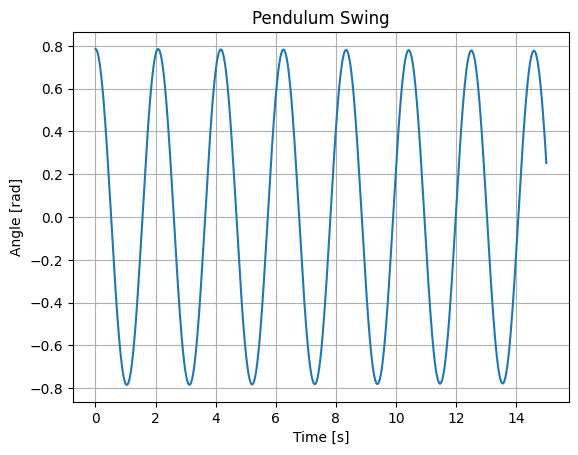

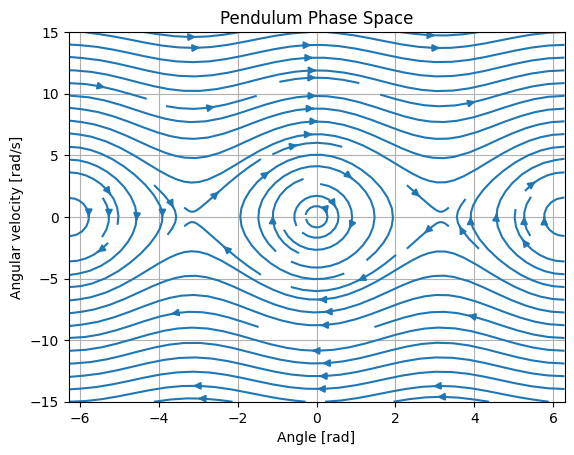

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
l = 1.0   # Length of the pendulum (m)

# Pendulum equation (theta'' = -(g/l) * sin(theta))
def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Time span and initial conditions
t_span = (0, 15)  # 10 seconds
y0 = [np.pi / 4, 0]  # Initial angle 45 degrees and initial angular velocity 0

# Solve the ODE
sol = solve_ivp(pendulum, t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 1000))

# Plotting the solution: theta(t)
plt.figure()
plt.plot(sol.t, sol.y[0])
plt.title('Pendulum Swing')
plt.xlabel('Time [s]')
plt.ylabel('Angle [rad]')
plt.grid(True)

# Vector field
theta_vals = np.linspace(-2*np.pi, 2*np.pi, 20)
omega_vals = np.linspace(-t_span[1], t_span[1], 20)
theta, omega = np.meshgrid(theta_vals, omega_vals)
dtheta_dt, domega_dt = pendulum(0, [theta, omega])

# Plotting the vector field
plt.figure()
plt.streamplot(theta_vals, omega_vals, dtheta_dt, domega_dt)
plt.title('Pendulum Phase Space')
plt.xlabel('Angle [rad]')
plt.ylabel('Angular velocity [rad/s]')
plt.grid(True)

# Show the plots
plt.show()

# Exercise 6
Explain how $T = m(\dot{x}_{+}^{2} + \dot{x}_{-}^{2})$ was derived

Where kinetic energy is defined as 

$T = \frac{m}{2}(x_{1} + x_{2})^{2}$

and

$x_{+} = \frac{(x_{1}+x_{2})}{2}$

and 

$x_{-} = \frac{(x_{1}-x_{2})}{2}$





$x_{1} = 2x_{+} - x_{2}$

$x_{1} = 2x_{-} + x_{2}$

$2x_{+} - x_{2} = 2x_{-} + x_{2}$

$\iff x_{2} = x_{+} - x_{-}$

$\implies x_{1} = x_{+} + x_{-}$

$T = \frac{m}{2}[(\dot{x}_{+}^{2} + \dot{x}_{-}^{2} + 2\dot{x}_{+}\dot{x}_{-}) + (\dot{x}_{+}^{2} + \dot{x}_{-}^{2} - 2\dot{x}_{+}\dot{x}_{-})]$

$= \frac{m}{2}(2\dot{x}_{+}^{2} + 2\dot{x}_{-}^{2})$

$= m(\dot{x}_{+}^{2} + \dot{x}_{-}^{2})$